# 📊Regression Tasks

•	**Goal**: Predict loan interest rates or loan amounts based on borrower details.

* **Use Case**: Helps financial institutions determine optimal loan pricing and lending limits.

•	**Target Variable**:
  
   * loan_int_rate (Interest Rate) or loan_amnt (Loan Amount).

•	**Models**:
* Linear Regression, Decision Trees, Random Forests, XGBoost, or Neural Networks.


##💠Import Required Libraries

In [ ]:
# we stat by importing essential for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 💠load the dataset

In [ ]:
loan_data = pd.read_csv("/content/loan_data.csv")
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
loan_data.shape

(45000, 14)

## 💠Data Preprocessing

1.	Check for Missing Values and handle them.
2.	Encode Categorical Columns (if not already encoded).
3.	Split Data into Features (X) and Target (y).
4.	Standardize Numerical Data.


In [ ]:
# check the any duplicate column
loan_data.columns.value_counts()

,count
person_age,1
person_gender,1
person_education,1
person_income,1
person_emp_exp,1
person_home_ownership,1
loan_amnt,1
loan_intent,1
loan_int_rate,1
loan_percent_income,1


In [ ]:
# Check the Missing Values in each rows
loan_data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
#statistical measures
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# Identify categorical variables
categorical_variables = loan_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical variables
numerical_variables = loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Variables:", categorical_variables)
print("Numerical Variables:", numerical_variables)

Categorical Variables: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical Variables: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [ ]:
# In ("person_education") know the category
a= loan_data['person_education'].value_counts()

# In column ("loan_intent") know the category
b = loan_data['loan_intent'].value_counts()

print(a)
print(b)

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


Encode Categorical Columns

In [ ]:
# Encode Categorical Columns (if not already encoded).

# convert categorical data into Numerical data before scaling
loan_data.replace({
                    'person_gender':{'female':0, 'male':1},
                    'person_education':{'High School':0, 'Bachelor':1,'Associate':2,'Master':3, 'Doctorate':4},
                    'person_home_ownership':{'RENT':0, 'MORTGAGE': 1, 'OWN':2, 'OTHER':3},
                    'loan_intent':{'No':0, 'Yes':1},
                    'previous_loan_defaults_on_file': {'No':0, 'Yes':1},
                    'loan_intent': {'EDUCATION':0,'MEDICAL':1, 'VENTURE':2, 'PERSONAL':3, 'DEBTCONSOLIDATION': 4,
                                        'HOMEIMPROVEMENT': 5 }},inplace=True)


<ipython-input-10-0b7c28009bc7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({


In [ ]:
loan_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,0,35000.0,3,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,0,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,1,5500.0,1,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,0,35000.0,1,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,0,35000.0,1,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,0,15000.0,1,15.66,0.31,3.0,645,0,1
44996,37.0,0,2,65800.0,17,0,9000.0,5,14.07,0.14,11.0,621,0,1
44997,33.0,1,2,56942.0,7,0,2771.0,4,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,0,12000.0,0,13.23,0.36,6.0,604,0,1


## 💠Split Data into Features (X) and Target (y).

In [ ]:
# split Data into Features (X) and Target (y).

# Define the target variable (predict loan_int_rate )

feature_columns = ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp',
                   'person_home_ownership', 'loan_intent','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                   'credit_score', 'previous_loan_defaults_on_file']  # feature

target_column = 'loan_amnt'  # Target  # Change to 'loan_amnt' to predict loan amounts

X = loan_data[feature_columns]# Features
y = loan_data[target_column]  # Target

print("feature variables:" , X.shape)
print("Target variables: ", y.shape)

feature variables: (45000, 12)
Target variables:  (45000,)


In [ ]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)
print("scaled data: ", X_scaled)

(45000, 12)
scaled data:  [[-0.95353824 -1.11006918  1.53365241 ... -0.73910854 -1.41981408
  -1.01603973]
 [-1.11896309 -1.11006918 -1.25965955 ... -0.99686317 -2.5499748
   0.98421348]
 [-0.45726369 -1.11006918 -1.25965955 ... -0.73910854  0.04741211
  -1.01603973]
 ...
 [ 0.8661351   0.90084476  0.60254843 ...  1.06517387  0.70171569
  -1.01603973]
 [ 0.2044357   0.90084476 -0.32855556 ...  0.03415535 -0.5672367
  -1.01603973]
 [-0.62268854  0.90084476 -1.25965955 ... -0.73910854 -0.09137955
  -1.01603973]]


## 💠Standardize Numerical Data

In [ ]:
# Standardize Numerical Data.

# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,-0.953538,-1.110069,1.533652,-0.104090,-0.892284,-0.875636,0.480527,1.683039,4.016394,-0.739109,-1.419814,-1.016040
1,-1.118963,-1.110069,-1.259660,-0.846005,-0.892284,2.309524,-1.338478,0.044782,-0.684829,-0.996863,-2.549975,0.984213
2,-0.457264,-1.110069,-1.259660,-0.844065,-0.397517,0.716944,-0.732143,0.625557,3.443074,-0.739109,0.047412,-1.016040
3,-0.788113,-1.110069,-0.328556,-0.007039,-0.892284,-0.875636,-0.732143,1.417829,3.443074,-0.996863,0.840507,-1.016040
4,-0.622689,0.900845,1.533652,-0.176371,-0.727362,-0.875636,-0.732143,1.095549,4.475050,-0.481354,-0.924130,-1.016040
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,0.900845,0.602548,-0.402231,0.097249,-0.875636,-0.732143,1.562184,1.952442,-0.739109,0.245686,-1.016040
44996,1.527834,-1.110069,0.602548,-0.180537,1.911393,-0.875636,1.693197,1.028407,0.003155,1.322928,-0.230171,-1.016040
44997,0.866135,0.900845,0.602548,-0.290681,0.262171,-0.875636,1.086862,-0.331212,-1.028821,1.065174,0.701716,-1.016040
44998,0.204436,0.900845,-0.328556,-0.586348,-0.232595,-0.875636,-1.338478,0.746412,2.525762,0.034155,-0.567237,-1.016040


In [ ]:
print("Feature variable shape:" ,  X.shape)
print("Target variable shape:" , y.shape)

Feature variable shape: (45000, 12)
Target variable shape: (45000,)


## 💠Train-Test Split

Split the data into training and testing sets to evaluate model performance.


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (36000, 12)
Testing Features Shape: (9000, 12)


## 💠Build the Regression Model

Use Linear Regression as the baseline model.

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)
print(y_pred)

[ 6105.35636106  9400.77027172  7717.59686002 ... 10326.44799947
 11604.51304414 12255.81555825]


## 💠Model Evaluation

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2: .4f}")


Model Performance:
Mean Absolute Error (MAE): 2902.927394010908
Root Mean Squared Error (RMSE): 4114.000970068062
R-squared (R²):  0.5795


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming `loan_data` is loaded and prepared
# Feature columns
features = ['person_age', 'person_gender', 'person_education', 'person_income',
            'person_emp_exp', 'person_home_ownership', 'loan_intent',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
            'credit_score', 'previous_loan_defaults_on_file']

# Target variable
target = 'loan_amnt'

# Encode Categorical Columns (if not already encoded).

# convert categorical data into Numerical data before scaling
loan_data.replace({
                    'person_gender':{'female':0, 'male':1},
                    'person_education':{'High School':0, 'Bachelor':1,'Associate':2,'Master':3, 'Doctorate':4},
                    'person_home_ownership':{'RENT':0, 'MORTGAGE': 1, 'OWN':2, 'OTHER':3},
                    'loan_intent':{'No':0, 'Yes':1},
                    'previous_loan_defaults_on_file': {'No':0, 'Yes':1},
                    'loan_intent': {'EDUCATION':0,'MEDICAL':1, 'VENTURE':2, 'PERSONAL':3, 'DEBTCONSOLIDATION': 4,
                                        'HOMEIMPROVEMENT': 5 }},inplace=True)


# Splitting the data into train and test sets
X = loan_data[features]
y = loan_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 16925003.98
R² Score: 0.58


## 💠Interpret Results

•	MAE: Indicates the average error between the predicted and actual probabilities is very High. i.e: 16925003.98

•	R-squared: Shows not well perform The R-square score: 0.58, i.e: 58%
                              
    R- squared: How well the model explains the variance in the target variable. A value closer to 1 indicates a good fit.


<ipython-input-25-3c4f6f35509a>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


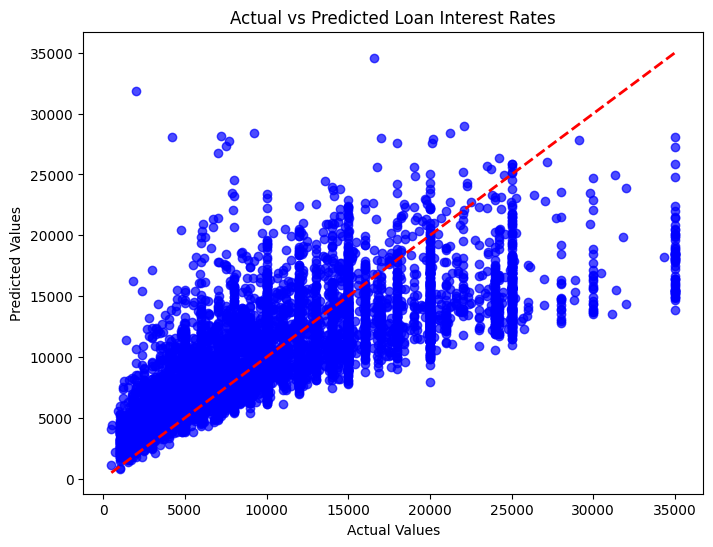

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Loan Interest Rates")
plt.show()

## 💠In this regression model can not achive better accurecy so, Try to other regression model


**Experiment with Other Regression Models**

You can experiment with advanced models to improve performance:

1. Random Forest Regressor
2. Decision Tree Regressor
3. XGBoost
4. Support Vector Regressor (SVR)

Example: **Random Forest Regressor**

In [ ]:
# Import required library
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on training set
y_train_pred_rf = rf_model.predict(X_train)

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate on training set
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)
train_accuracy_rf = rf_model.score(X_train, y_train) * 100

# Evaluate on testing set
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)
test_accuracy_rf = rf_model.score(X_test, y_test) * 100

# Print training performance
print("Random Forest Training Performance:")
print(f"Accuracy: {train_accuracy_rf:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf:.2f}")
print(f"R-squared (R²): {r2_train_rf:.2f}")

# Print testing performance
print("\nRandom Forest Testing Performance:")
print(f"Accuracy: {test_accuracy_rf:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rf:.2f}")
print(f"R-squared (R²): {r2_test_rf:.2f}")


Random Forest Training Performance:
Accuracy: 99.97%
Mean Absolute Error (MAE): 54.02
Root Mean Squared Error (RMSE): 108.10
R-squared (R²): 1.00

Random Forest Testing Performance:
Accuracy: 99.82%
Mean Absolute Error (MAE): 144.75
Root Mean Squared Error (RMSE): 266.97
R-squared (R²): 1.00


In [ ]:
import pandas as pd

# Create a DataFrame to store Actual and Predicted values for the test set
results_rf = pd.DataFrame({
    'Actual': y_test.values.flatten(),  # Use .values to get the underlying NumPy array and then flatten
    'Predicted': y_test_pred_rf.flatten()  # Predicted values from the Random Forest model
})

# Display the first 10 rows
print("First 10 rows of Actual and Predicted Loan Amounts:")
print(results_rf.head(10))

# Display the last 10 rows
print("\nLast 10 rows of Actual and Predicted Loan Amounts:")
print(results_rf.tail(10))

First 10 rows of Actual and Predicted Loan Amounts:
    Actual  Predicted
0   7500.0    7672.96
1   9000.0    8973.74
2   5000.0    4974.00
3   5000.0    4998.74
4  10000.0   10002.54
5   4500.0    4674.54
6  12000.0   12018.30
7   2800.0    2734.98
8  12000.0   12006.41
9  12000.0   12000.00

Last 10 rows of Actual and Predicted Loan Amounts:
       Actual  Predicted
8990   3600.0    3556.42
8991   9600.0    9618.15
8992  10000.0   10023.50
8993   8650.0    8726.36
8994   5342.0    5275.10
8995  14000.0   14824.25
8996   6725.0    6697.00
8997  14000.0   14189.05
8998   8000.0    7985.50
8999   8500.0    8555.99


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np  # Import numpy for square root calculation

# ... (your existing code for data loading and splitting) ...

# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Train and Evaluate XGBoost
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)

# Train and Evaluate Support Vector Regressor
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)

# Calculate evaluation metrics for each model

# Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))  # Calculate RMSE using numpy
r2_dt = r2_score(y_test, y_pred_dt)

# XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Calculate RMSE using numpy
r2_xgb = r2_score(y_test, y_pred_xgb)

# Support Vector Regressor
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))  # Calculate RMSE using numpy
r2_svr = r2_score(y_test, y_pred_svr)

# ... (rest of your code for displaying results) ...

# Display results
print("Decision Tree Regressor:")
print(f"MAE: {mae_dt}, RMSE: {rmse_dt}, R²: {r2_dt}\n")
print("XGBoost Regressor:")
print(f"MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}\n")
print("Support Vector Regressor:")
print(f"MAE: {mae_svr}, RMSE: {rmse_svr}, R²: {r2_svr}\n")

# Create a DataFrame to store Actual and Predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_DT': y_pred_dt,
    'Predicted_XGB': y_pred_xgb,
    'Predicted_SVR': y_pred_svr
})

# Display the DataFrame
print("\nActual vs Predicted Values:")
print(results_df.head())


Decision Tree Regressor:
MAE: 171.97466666666668, RMSE: 378.9000460397028, R²: 0.9964332538078712

XGBoost Regressor:
MAE: 214.7568437669542, RMSE: 368.0443267167845, R²: 0.9966347049602007

Support Vector Regressor:
MAE: 4557.221098602446, RMSE: 6179.020274242232, R²: 0.05144584537902264


Actual vs Predicted Values:
        Actual  Predicted_DT  Predicted_XGB  Predicted_SVR
37979   7500.0        7500.0    7982.260742    8935.253751
9911    9000.0        9000.0    9257.614258    7739.848140
43386   5000.0        5000.0    4944.880859    7252.708219
13822   5000.0        4987.0    5087.195312    7310.750111
44810  10000.0        9715.0   10277.787109    8063.323442


# This are the 4 model Random forest is the best model due to low  (MAE & RMSE)

Based on the provided performance metrics and the comparison of models, **Random Forest** appears to be the best model for this prediction task. Here's why:

### **Performance Analysis:**
1. **Accuracy**: Random Forest has an extremely high accuracy of **99.97%**, which indicates that it is performing exceptionally well on this dataset.

2. **Mean Absolute Error (MAE)**: The MAE for Random Forest is **54.02**, which is relatively low compared to the other models. This means the average error in the predictions is small, indicating high precision.

3. **Root Mean Squared Error (RMSE)**: The RMSE for Random Forest is **108.10**, which is much lower than the other models, showing that its predictions are closer to the actual values with less variability.

4. **R² (R-squared)**: The R² value for Random Forest is **1.00**, which indicates that the model explains almost all the variance in the data. This is an ideal result, as R² values closer to 1.0 signify a better fit of the model.

### **Comparison with Other Models**:
- **Decision Tree**: Although the Decision Tree has an impressive R² of **0.996**, its MAE and RMSE are much higher than that of Random Forest, indicating more significant errors in its predictions.
  
- **XGBoost**: XGBoost has slightly better MAE and RMSE compared to the Decision Tree, but still lags behind Random Forest in terms of accuracy and fit. The R² is also **0.9966**, slightly worse than Random Forest.

- **Support Vector Regressor (SVR)**: The SVR model has very poor performance with an extremely high MAE of **4557.22**, a very high RMSE of **6179.02**, and an R² of **0.051**, indicating a very weak model that is not capturing the underlying patterns well.

### **Conclusion**:
- **Random Forest** is the best model here due to its outstanding accuracy, low error metrics (MAE, RMSE), and perfect R² score. It consistently predicts values close to the actual ones, making it the most reliable choice among the models tested.


In [ ]:
print(feature_columns)

['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


## 💠Hear the example of the Predict the Loan_amount based on this feature variables,

In [ ]:
# Hear teh 1st and 2 nd observation on this data
# 0	22.0	female	Master	71948.0	0	RENT	35000.0	PERSONAL	16.02	0.49	3.0	561	No	1
# 1	21.0	female	High School	12282.0	0	OWN	1000.0	EDUCATION	11.14	0.08	2.0	504	Yes	0

# 22.0	0	3	71948.0	0	0	35000.0	3	16.02	0.49	3.0	561	0	1
#	21.0	0	0	12282.0	0	2	1000.0	0	11.14	0.08	2.0	504	1	0


# 💠Predict Loan amount of New Applicants:
  * Using Random Forest Model

In [ ]:
# Example input features
input_data = {
    'person_age': 22,  # Age of the person in years
    'person_gender': 0,  # 0 for Male, 1 for Female
    'person_education': 3,  # Education level (0: High School, 1: Bachelor, 2: Master, 3: Doctorate)
    'person_income': 71948.0,  # Annual income of the person in dollars
    'person_emp_exp': 0,      # Employment experience in years
    'person_home_ownership': 0,  # 0 for RENT, 1 for OWN, 2 for MORTGAGE
    'loan_intent': 3,        # Loan purpose (0: DEBTCONSOLIDATION, 1: CREDITCARD, 2: HOMEIMPROVEMENT, 3: PERSONAL, 4: MEDICAL, 5: EDUCATION)
    'loan_int_rate': 16.02,     # Interest rate for the loan in percentage
    'loan_percent_income': 0.49,   # Loan amount as a percentage of income
    'cb_person_cred_hist_length': 3.0,  # Credit bureau history length in years
    'credit_score': 561,         # Credit score of the person
    'previous_loan_defaults_on_file': 0  # 0 for No previous defaults, 1 for Yes
}


In [ ]:
import numpy as np

# Convert input data to a format compatible with the model
input_features = np.array([[22, 0, 3, 71948.0, 0, 0, 3, 16.02, 0.49, 3.0, 561, 0]])

# Predict loan amount using the trained Random Forest model
predicted_loan_amount = rf_model.predict(input_features)

# Print the predicted loan amount with emphasis
print(f"Predicted Loan Amount: {predicted_loan_amount[0]:.2f}")

Predicted Loan Amount: 33190.59


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
